In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns

In [36]:
data=pd.read_csv("DS.csv")

In [37]:
# Converting the Yes/no's as required by to the yes->1 and no->0
data['Has_Table_booking'] = data['Has Table booking'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
data['Has_Online_delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

# Calculating  the percentages of the table_bookings and the online_delivery atribs
table_booking_per = data['Has_Table_booking'].mean() * 100
online_delivery_per = data['Has_Online_delivery'].mean() * 100

print(f"Percentage of restaurants with table booking: {table_booking_per:.2f}%")
print(f"Percentage of restaurants with online delivery: {online_delivery_per:.2f}%")

Percentage of restaurants with table booking: 12.12%
Percentage of restaurants with online delivery: 25.66%


In [38]:
# checking table available or not using tyhes aggregate rating average 
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')

# table booking availability and calculate average rating
avg_rating_table_booking = data.groupby('Has_Table_booking')['Aggregate rating'].mean()

print("Average ratings for Table Booking availability:")
avg_rating_table_booking

Average ratings for Table Booking availability:


Has_Table_booking
0    2.559359
1    3.441969
Name: Aggregate rating, dtype: float64

In [39]:
# checking the price ranges and calculating percentages of restaurants having online_delivery
online_delivery_price = data.groupby('Price range')['Has_Online_delivery'].mean() * 100

print("Percentage of restaurants with Online_delivery using Price Ranges:")
online_delivery_price


Percentage of restaurants with Online_delivery using Price Ranges:


Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has_Online_delivery, dtype: float64

C:\Users\Eswar\AppData\Local\Temp\ipykernel_21580\628708756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has_Table_booking', y='Aggregate rating', data=avg_rating_df, palette='Greens_d')


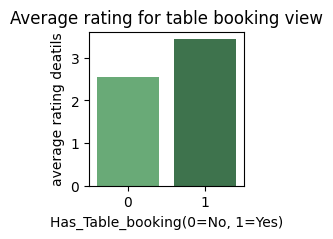

C:\Users\Eswar\AppData\Local\Temp\ipykernel_21580\628708756.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has_Online_delivery', y='Price range', data=avg_rating_Od_df, palette='Blues_d')


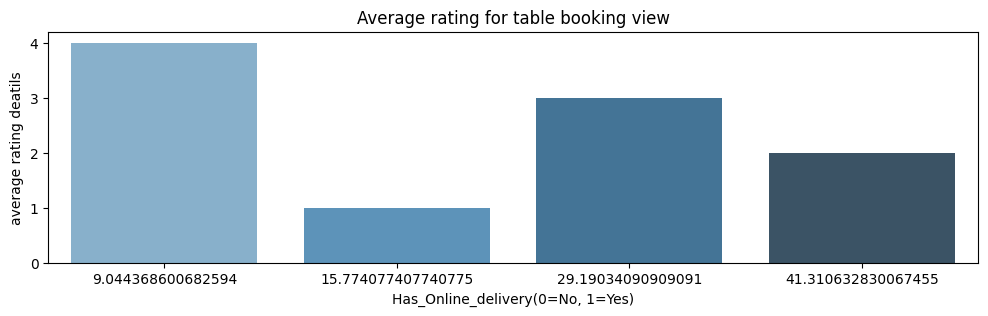

In [70]:
plt.figure(figsize=(2,2))
#while visualizing df converstion required to create fro makiing the bar
avg_rating_df = avg_rating_table_booking.reset_index()
sns.barplot(x='Has_Table_booking', y='Aggregate rating', data=avg_rating_df, palette='Greens_d')
plt.title('Average rating for table booking view')
plt.xlabel('Has_Table_booking(0=No, 1=Yes)')
plt.ylabel('average rating deatils')
plt.show()
#
plt.figure(figsize=(12,3))
#while visualizing df converstion required to create fro makiing the bar
avg_rating_Od_df = online_delivery_price.reset_index()
sns.barplot(x='Has_Online_delivery', y='Price range', data=avg_rating_Od_df, palette='Blues_d')
plt.title('Average rating for table booking view')
plt.xlabel('Has_Online_delivery(0=No, 1=Yes)')
plt.ylabel('average rating deatils')
plt.show()

In [41]:
#Task-2
MCP_range = data['Price range'].mode()[0]
print(f"Most common price range: {MCP_range}")


Most common price range: 1


In [42]:
avg_price = data.groupby('Price range')['Aggregate rating'].mean()
print("Average rating per price range:",avg_price)


Average rating per price range: Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [43]:
mean_rating_color = data.groupby('Price range').agg({
    'Aggregate rating': 'mean',
    'Rating color': lambda x: x.mode()[0]  # Most frequent color in each group
})
best_price_range = mean_rating_color['Aggregate rating'].idxmax()
best_color = mean_rating_color.loc[best_price_range, 'Rating color']
print(f"Price range with highest average ratings: {best_price_range}")
print(f"Color represeting highest averge ratings: {best_color}")


Price range with highest average ratings: 4
Color represeting highest averge ratings: Yellow


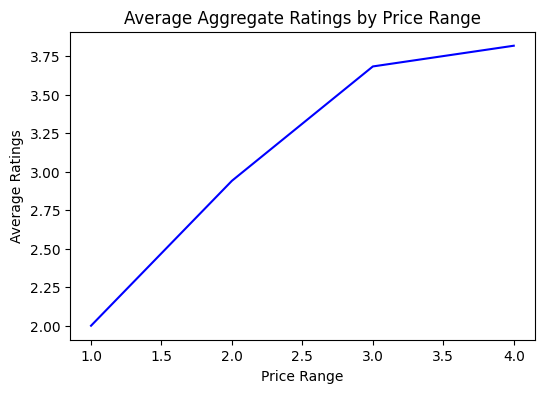

In [44]:
plt.figure(figsize=(6,4))
avg_price.plot(kind='line', color='blue')
plt.title('Average Aggregate Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Ratings')
plt.show()

In [59]:
#Task-3
# Adding the  lengths of the restaurant names and address to the data set
data['Length_of_Restaurant_Name'] = data['Restaurant Name'].apply(lambda x: len(str(x)))
data['Length_of_Address'] = data['Address'].apply(lambda x: len(str(x)))
#showing the Availability of table_booking and Online_delivery in binary formats coz to use it in future for aggregate_rating and calculation purposes.
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Has_Table_booking,Has_Online_delivery,Length_of_Restaurant_Name,Length_of_Address
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,1,0,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,1,0,16,67


In [60]:
features = [
    'Length_of_Restaurant_Name',
    'Length_of_Address',
    'Has_Table_booking',
    'Has_Online_delivery',
    'Price range',
    'Aggregate rating',
    'Votes'
]

In [67]:
X = data[features]
y = pd.to_numeric(data['Aggregate rating'], errors='coerce') 
X = X.dropna()
y = y.loc[X.index]
X.head(6)
#y.head(6)

,Length_of_Restaurant_Name,Length_of_Address,Has_Table_booking,Has_Online_delivery,Price range,Aggregate rating,Votes
0,16,71,1,0,3,4.8,314
1,16,67,1,0,3,4.5,591
2,22,56,1,0,4,4.4,270
3,4,70,0,0,4,4.9,365
4,11,64,1,0,4,4.8,229
5,12,71,0,0,3,4.4,336


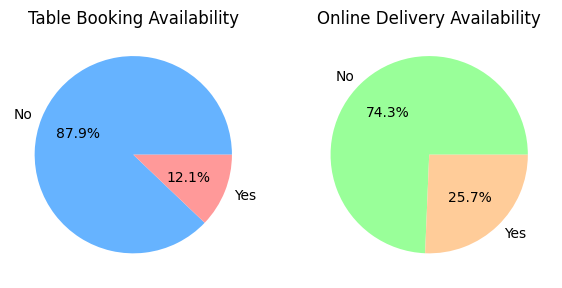

In [87]:
# prepare data: count Yes/No for Has Table booking and Has Online delivery
table_booking_counts = data['Has Table booking'].value_counts()
online_delivery_counts = data['Has Online delivery'].value_counts()
# Pie-chart for Availability of Table_booking
plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
plt.pie(table_booking_counts, labels=table_booking_counts.index, autopct='%1.1f%%',colors=['#66b3ff','#ff9999'])
plt.title('Table Booking Availability')
# Pie-chart for Availability of Online_delivery
plt.subplot(1, 2, 2)
plt.pie(online_delivery_counts, labels=online_delivery_counts.index, autopct='%1.1f%%',colors=['#99ff99','#ffcc99'])
plt.title('Online Delivery Availability')
plt.show()


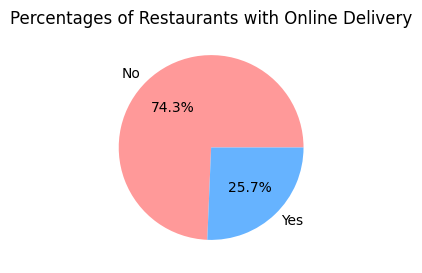

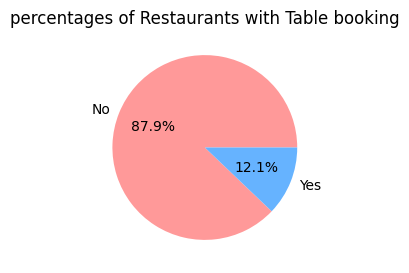

In [94]:
plt.figure(figsize=(3,3))
counts = data['Has Online delivery'].apply(lambda x: 1 if x.lower() == 'yes' else 0).value_counts()
plt.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Percentages of Restaurants with Online Delivery')
plt.show()
plt.figure(figsize=(3,3))
counts = data['Has Table booking'].apply(lambda x: 1 if x.lower() == 'yes' else 0).value_counts()
plt.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('percentages of Restaurants with Table booking')
plt.show()